In [1]:
import os.path as op
from glob import glob

import matplotlib.pyplot as plt
import nibabel as nib

from utils import plot_gradient, plot_subcortical_gradient, plot_meta_maps

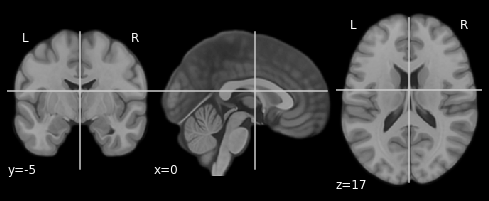

In [2]:
result_dir = op.abspath("../results")
data_dir = op.abspath("../data")
output_dir = op.join(result_dir, "gradient_decoding")
bg_file = op.join(data_dir, "templates", "mni152.nii.gz")
bg_img = nib.load(bg_file)

from nilearn import plotting
plotting.plot_anat(bg_img)

# Neurosynth

## Term-based Meta-Analysis

/Users/jperaza/Documents/envs/gradec_env/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


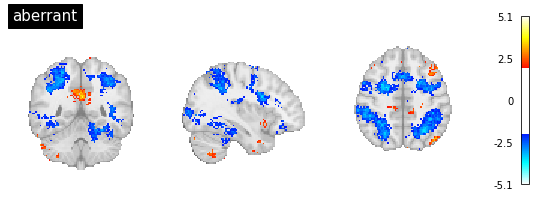

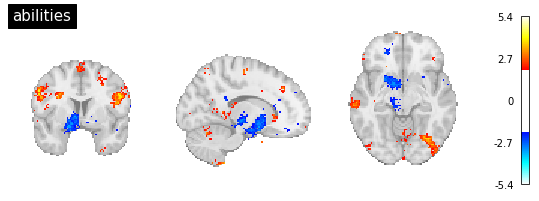

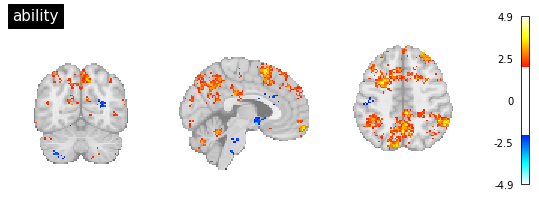

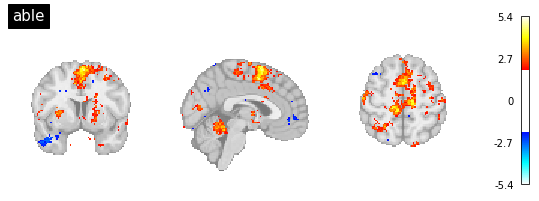

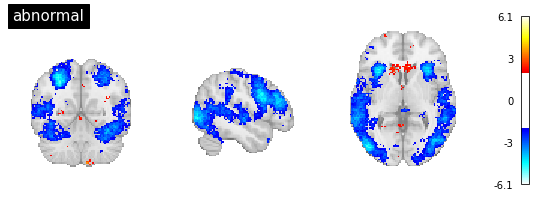

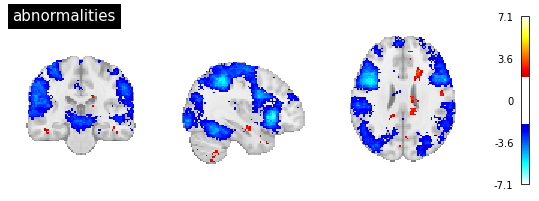

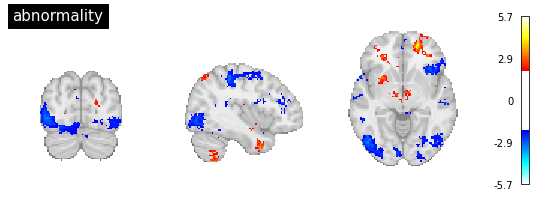

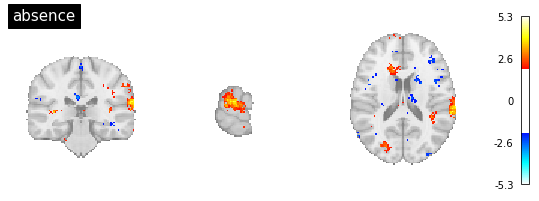

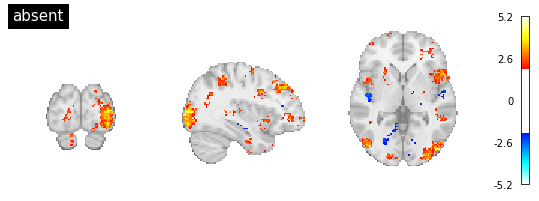

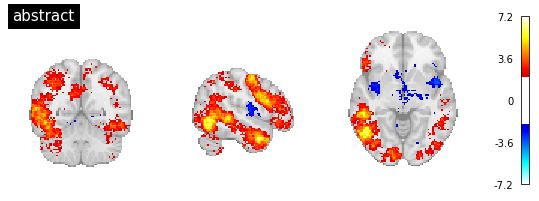

In [3]:
term_based_ns_decoder_fn = op.join(output_dir, f"term-based_neurosynth_decoder.pkl.gz")
# For Neurosynth n_init=60, to plot features with names
plot_meta_maps(term_based_ns_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

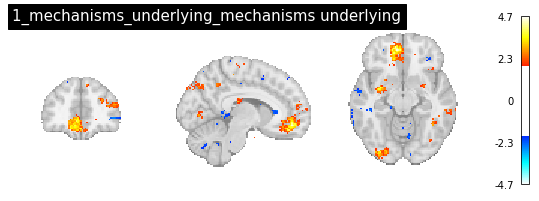

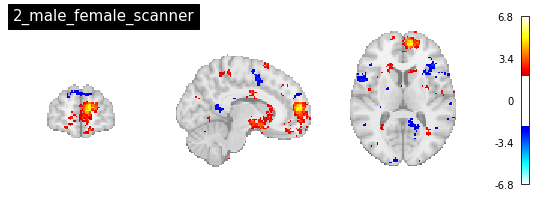

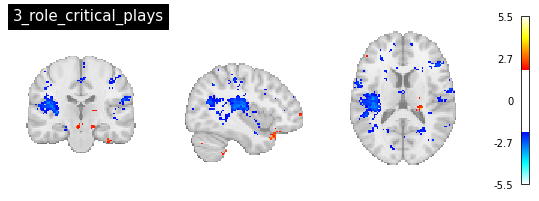

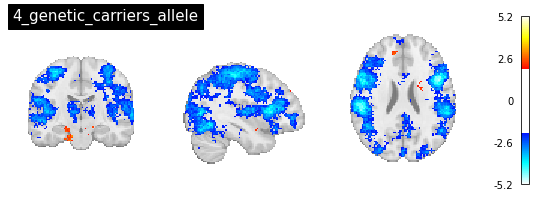

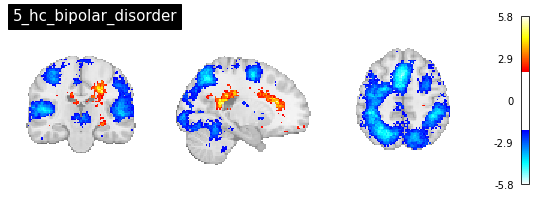

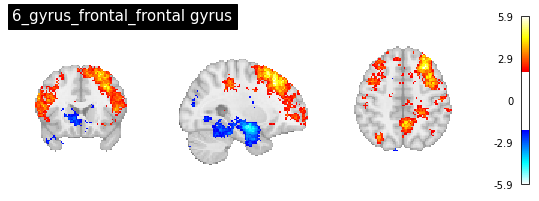

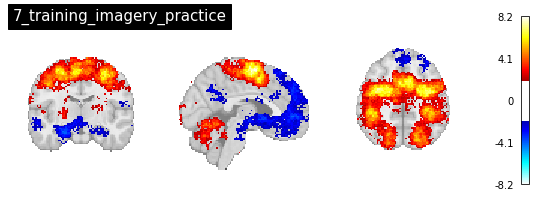

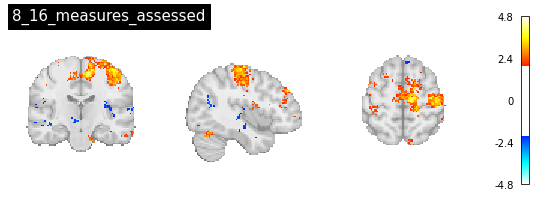

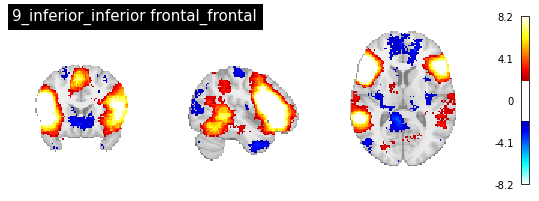

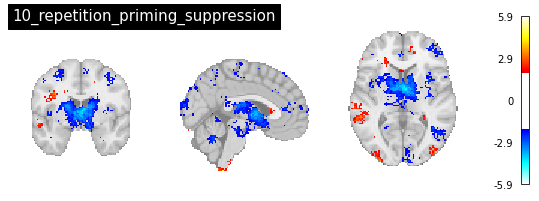

In [4]:
lda_based_ns_decoder_fn = op.join(output_dir, f"lda-based_neurosynth_decoder.pkl.gz")
plot_meta_maps(lda_based_ns_decoder_fn)

## GCLDA-based Meta-Analysis

/Users/jperaza/Documents/envs/gradec_env/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


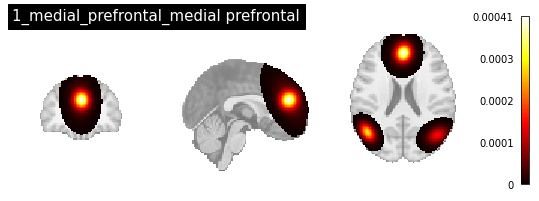

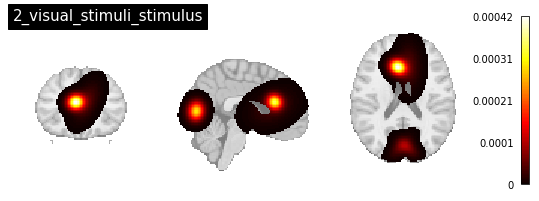

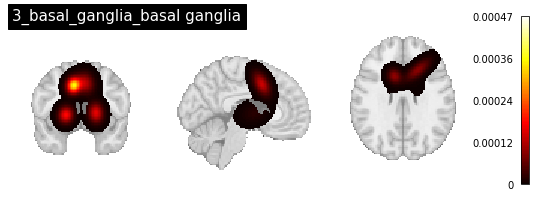

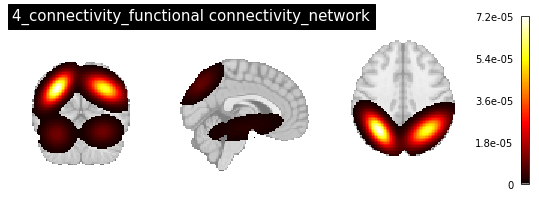

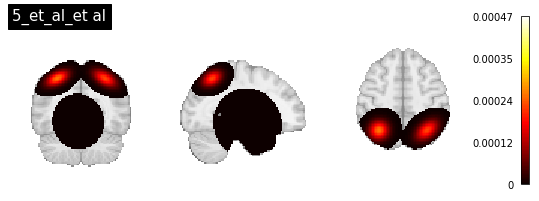

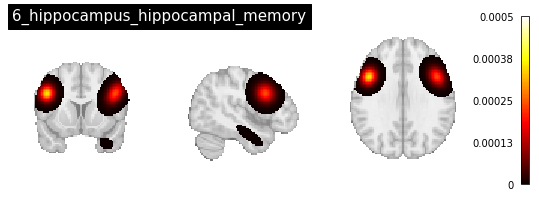

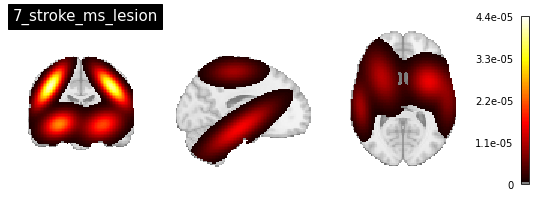

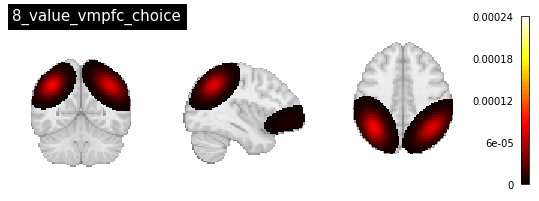

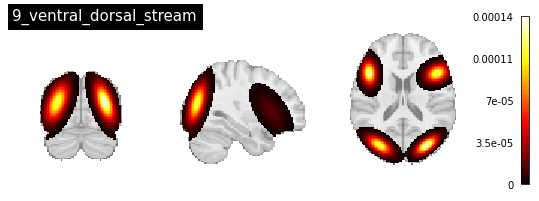

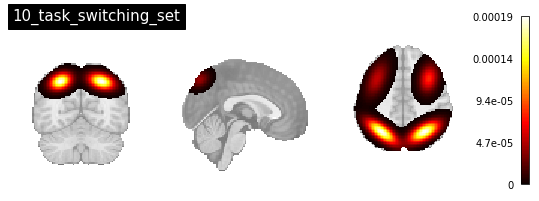

In [3]:

gclda_based_ns_decoder_fn = op.join(output_dir, "gclda_neurosynth_model.pkl.gz")
plot_meta_maps(gclda_based_ns_decoder_fn, threshold=0.000001, model="gclda")

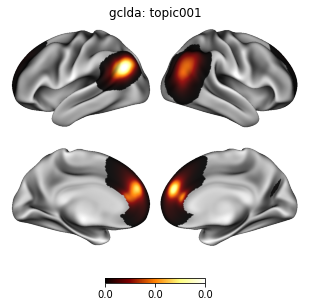

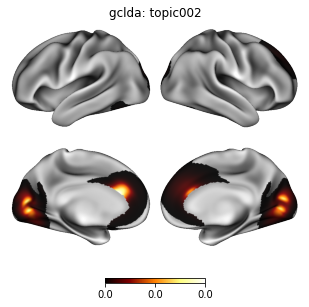

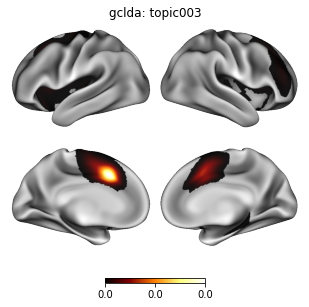

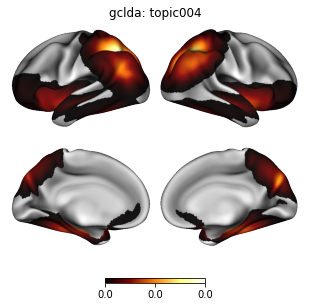

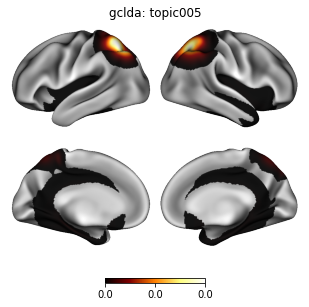

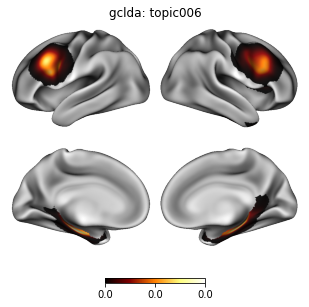

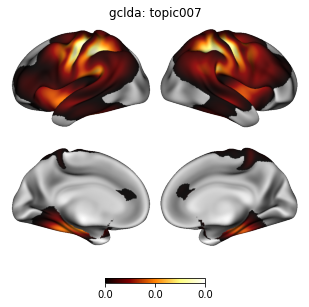

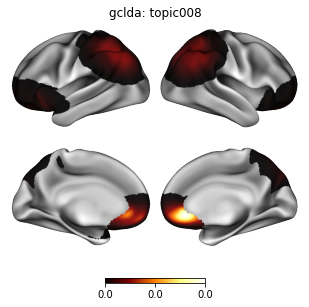

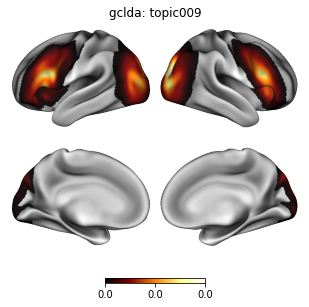

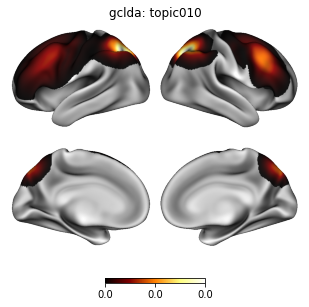

In [5]:
gclda_grad_path = op.join(output_dir, "gclda-fslr")
gclda_grad_lh_fnames = sorted(glob(op.join(gclda_grad_path, "*hemi-L_feature.func.gii")))
gclda_grad_rh_fnames = sorted(glob(op.join(gclda_grad_path, "*hemi-R_feature.func.gii")))
gclda_subcort_grad_fnames = sorted(glob(op.join(gclda_grad_path, "*_feature.nii.gz")))
gclda_grad_fnames = zip(gclda_grad_lh_fnames[:10], gclda_grad_rh_fnames[:10])

plot_gradient("../data", gclda_grad_fnames, threshold_=0.000001, cmap="afmhot")

In [13]:
import gzip
import pickle
from nilearn import image, masking
from neuromaps import transforms

gclda_based_ns_decoder_fn = op.join(output_dir, "gclda_neurosynth_model.pkl.gz")
decoder_file = gzip.open(gclda_based_ns_decoder_fn, "rb")
decoder = pickle.load(decoder_file)
meta_maps_imgs = masking.unmask(
            decoder.p_voxel_g_topic_.T, decoder.mask
        )

In [25]:
from neuromaps.datasets import fetch_atlas
import nibabel as nib

import ..utils

data_dir = "../data"
neuromaps_dir = op.join(data_dir, "neuromaps-data")
atlas = fetch_atlas("fsLR", "32k", data_dir=data_dir, verbose=0)
medial_lh, medial_rh = atlas['medial']
medial_arr_lh = nib.load(medial_lh).agg_data()
medial_arr_rh = nib.load(medial_rh).agg_data()
print(medial_arr_lh.shape, medial_arr_rh.shape)

gclda_meta_map = image.index_img(meta_maps_imgs, 0)
gclda_meta_map_lh, gclda_meta_map_rh = transforms.mni152_to_fslr(gclda_meta_map)

gclda_meta_map_arr_lh = gclda_meta_map_lh.agg_data()
gclda_meta_map_arr_rh = gclda_meta_map_rh.agg_data()


SyntaxError: invalid syntax (467318174.py, line 4)

In [22]:
print(gclda_meta_map_arr_lh.shape)
print(gclda_meta_map_arr_rh.shape)

(32492,)
(32492,)


# NeuroQuery

## Term-based Meta-Analysis

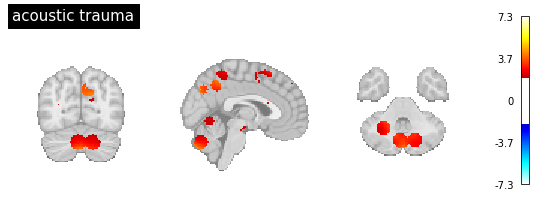

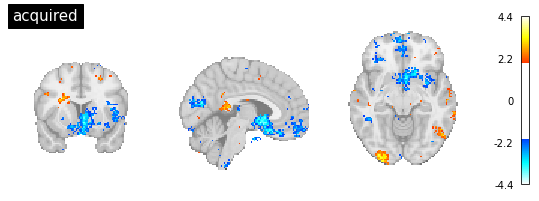

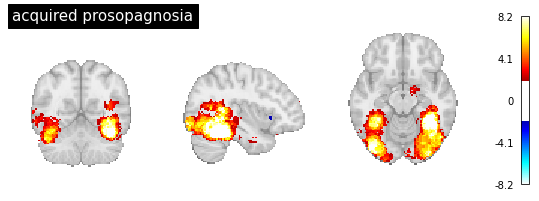

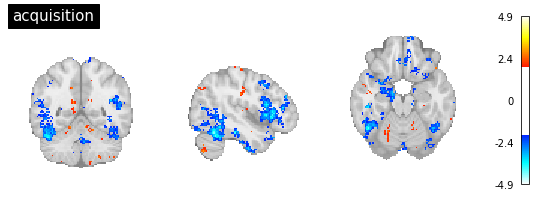

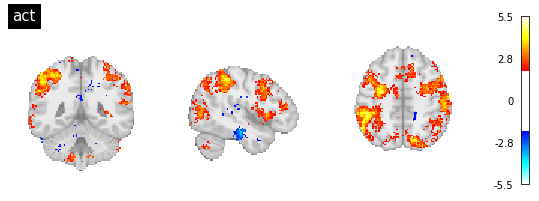

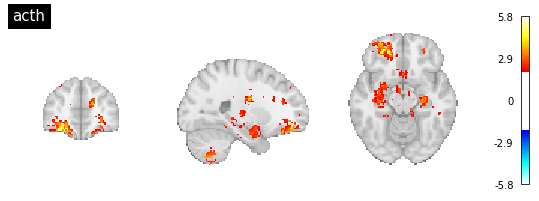

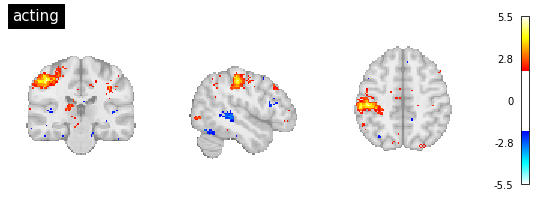

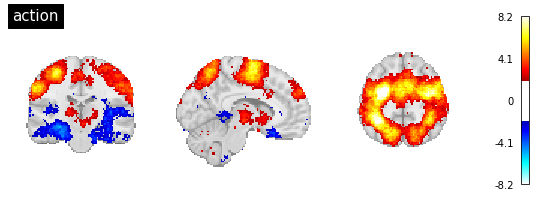

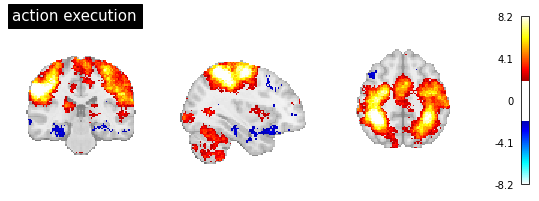

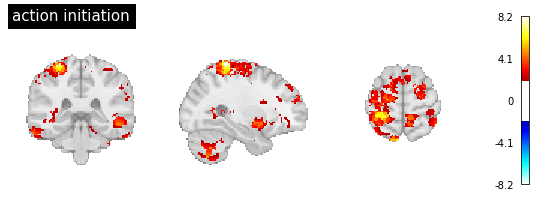

In [5]:
term_based_nq_decoder_fn = op.join(output_dir, f"term-based_neuroquery_decoder.pkl.gz")
# For NeuroQuery n_init=60, to plot features with names
plot_meta_maps(term_based_nq_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

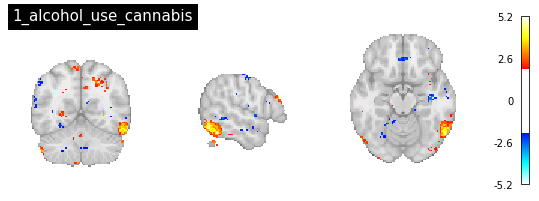

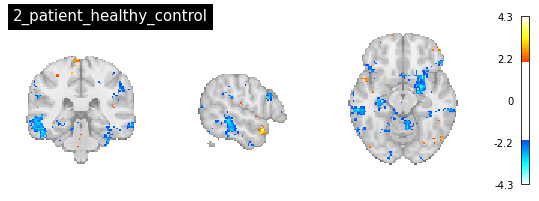

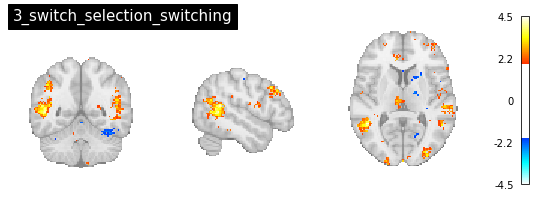

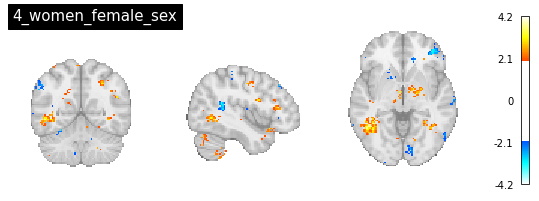

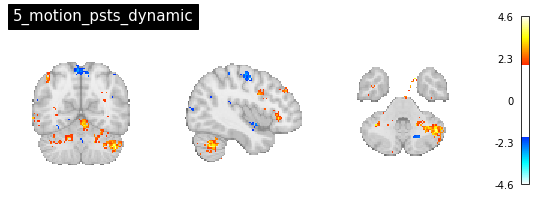

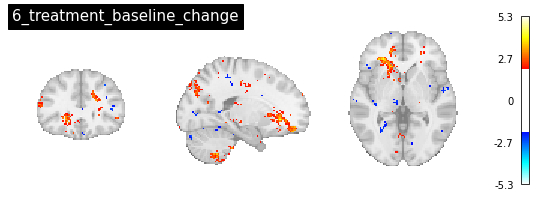

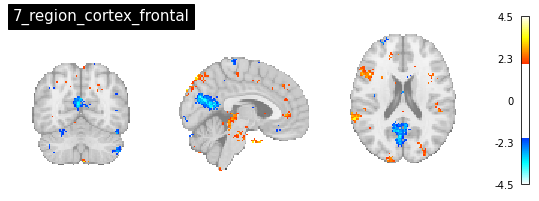

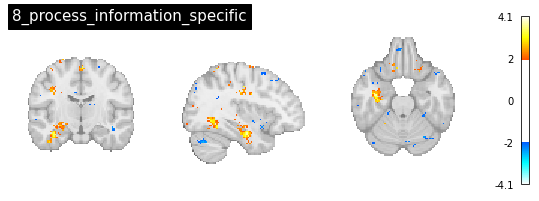

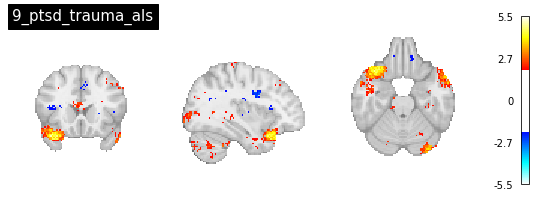

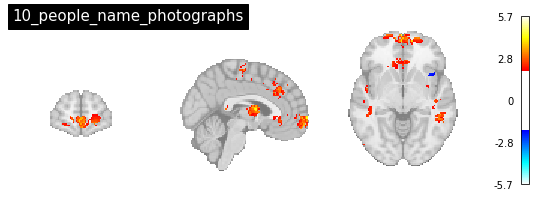

In [6]:
lda_based_nq_decoder_fn = op.join(output_dir, f"lda-based_neuroquery_decoder.pkl.gz")
plot_meta_maps(lda_based_nq_decoder_fn)